In [1]:
import numpy as np

#Read the csv file with the genfromtxt() function replacing missing values with 0
fname = "median-rent-by-town-and-flat-type/median-rent-by-town-and-flat-type.csv"
datarent = np.genfromtxt(fname, delimiter=',',skip_header=1,dtype=[('quarter','U25'),('town','U25'),('flat_type','U25'),('median_rent','i8')],missing_values=['na','-'],filling_values=0)


In [2]:
title = "Median Rent by Town & Flat Type"
titlelen = len(title)
print("{:*^{titlelen}}".format(title,titlelen=titlelen+6))

#Print out the number of rows in this dataset
print("There are {} rows in this dataset".format(len(datarent)))
print()
print("There are {} years in this dataset".format(len(set(datarent['quarter']))))

datastats = datarent['median_rent']

#Find out the maximum median rent in which year and which town
max_rent = datastats.max()
argmax_rent = datastats.argmax()
max_town = datarent[argmax_rent]['town']
max_year = datarent[argmax_rent]['quarter']
max_flat = datarent[argmax_rent]['flat_type']
print("The maximum median rent is ${} for {} at {} during {}".format(max_rent,max_flat,max_town,max_year))

#Find the minimum median rent in which year and which town
min_rent = datastats.min()
argmin_rent = datastats.argmin()
min_town = datarent[argmin_rent]['town']
min_year = datarent[argmin_rent]['quarter']
print("The maximum median rent is ${} at {} during {}".format(min_rent,min_town,min_year))

***Median Rent by Town & Flat Type***
There are 9717 rows in this dataset

There are 62 years in this dataset
The maximum median rent is $3600 for 5-RM at CENTRAL during 2016-Q3
The maximum median rent is $0 at ANG MO KIO during 2005-Q2


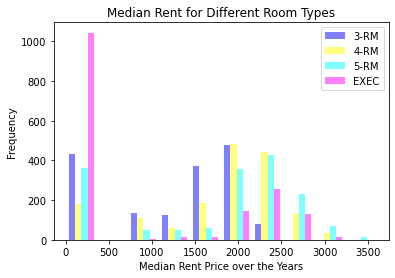

In [14]:
import matplotlib.pyplot as plt

labels = ['3-RM','4-RM','5-RM','EXEC'] #labels for different data in the chart

room_cost = datarent[['flat_type','median_rent']] #extracting the data for both flat type and median rent

cost = room_cost['median_rent'] 
cost_3rm =cost[room_cost['flat_type'] == "3-RM"] #extracting the rental price for 3room flat type
cost_4rm =cost[room_cost['flat_type'] == "4-RM"]#extracting the rental price for 4room flat type
cost_5rm =cost[room_cost['flat_type'] == "5-RM"]#extracting the rental price for 5room flat type
cost_exec = cost[room_cost['flat_type'] == "EXEC"]#extracting the rental price for executive flat type

cost_combined = [cost_3rm, cost_4rm,cost_5rm, cost_exec] 

plt.xlabel("Median Rent Price over the Years")
plt.ylabel("Frequency")
plt.title("Median Rent for Different Room Types")
plt.figure(1,figsize = (40,40))

#plotting a histogram of all the rental prices for the 4 different room types with different colors and labels
hist_all = plt.hist(cost_combined, alpha=0.5, color=['blue','yellow','cyan','magenta'],label=labels) 
plt.legend()
plt.show()


In [7]:
#create a dictionary to store the mean resale price of each year
rent = {} 

#iterate through the years 1990 to 2014 for corresponding resale price
rent_year_price = 2005 #data starts from 2005
while rent_year_price < 2021: #data ends in 2020
    keyword = str(rent_year_price) #converting int to str for search in column
    column_to_search = datarent['quarter'] 
    out = [i for i, v in enumerate(column_to_search) if keyword in v]
    rprice_out = datarent[out]
    #store the mean of median rental price of each year under the corresponding year key
    rprice = np.mean(rprice_out['median_rent'])
    rent["{0}".format(rent_year_price)] = int(rprice)
    #loop through the next year until 2021
    rent_year_price =rent_year_price +1
     
#print(rent)


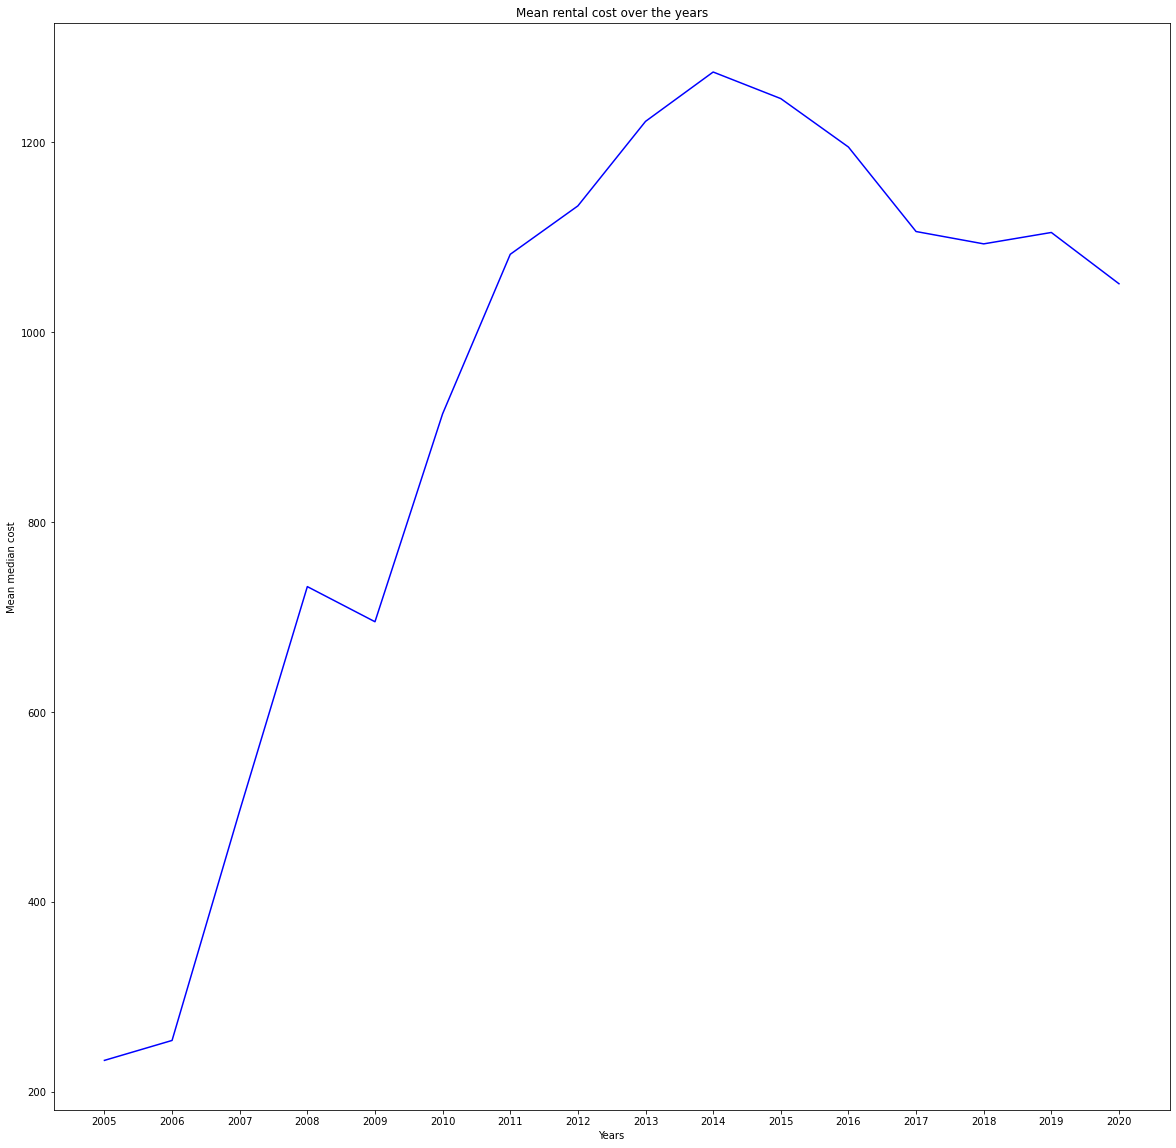

In [8]:
import matplotlib.pyplot as plt

year = list(rent.keys()) #extracting the different years
meanrent = list(rent.values()) #extracting the corresponding mean of median rental price for the different years

fig1,ax1 = plt.subplots(1,figsize=(20,20))

plt.plot(year,meanrent, c="b") #plotting a line graph
ax1.set(xlabel="Years",ylabel="Mean median cost",title= "Mean rental cost over the years")
plt.show()